<h1>Capstone Project #1</h1>
<h2>Predicting Customer Churn</h2>
<h3>Cliff Robbins</h3>

<h3>Proposal</h3>
<p>My project will focus on a problem that 28 million business face each day of operation, customer churn.</p>

<h3>Description:</h3>
<p><strong>Customer churn</strong>, also known as customer attrition, customer turnover or customer defection is the loss of clients or customers.  Many companies include customer churn rate as part of their monitoring metrics because the cost of retaining current customers compared to acquiring new customers is much less.  
Within customer churn there is the concept of voluntary and involuntary churn with voluntary being a customer leaves on their own choice while involuntary could be attributed to customer relocation to a long term care facility, death or customer relocation in a different state/geography.  In most analytical models, involuntary churn is excluded from the metric.
</p>

<h3>Formulation of a Question</h3>
<p>When a company first starts up, the founding members can typically handle all of the various customer concerns.  As the company continues to grow, the founders can no longer service all of the various clients with support handled by a customer service team.  The customer service team focuses on current issues and a proactive approach is lost.</p>
<p>As the company grows, the company still cares about its clients; however, due to the large customer base they can no longer address each and every customer.  This is a real problem for companies.  How does a company proactively predict if a customer is happy or unhappy?  How does a company know if a customer is so unhappy that they are willing to leave?  If a company knew if a customer was getting ready to leave, could they reach out to the customer and mend the relationship?</p>
<h3>Hypothesis</h3>
<p>I believe past customer data can predict future customer churn. </p>
<h3>Prediction</h3>
<p>If I had past customer data that showed various features and whether they stayed or churned we could use that data to predict future outcomes of current customers.</p>
<h3>Testing</h3>
<p>To test my hypothesis, I will use a set of customer data with various features along with whether they churned or not.</p>
<p>The data has 7043 rows and can be found at:</p>
<p>https://www.kaggle.com/blastchar/telco-customer-churn</p>


<h2>Story Telling</h2>
<p>Now that the data is validated and cleaned I will focus on understanding the data and sharing insights found in the data.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import h5py
import seaborn as sns #requires 0.9.0
import researchpy as rp
from scipy import stats

/Users/cliff/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h2>Import that data from our previous notebook</h2>

In [23]:
#Lets import the data
cleaned_customer_churn_df = pd.read_hdf('data/cp1-1-assigned-data.hdf5',key='cleaned_data',mode='r')

#Validate it was read
print(cleaned_customer_churn_df.head())

#Lets get a df of just churned customers
cleaned_churned_customer_churn_df = cleaned_customer_churn_df[cleaned_customer_churn_df.Churn == 'Yes']

print(cleaned_churned_customer_churn_df.head())

            gender SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                 
7590-VHVEG  Female             0     Yes         No       1           No   
5575-GNVDE    Male             0      No         No      34          Yes   
3668-QPYBK    Male             0      No         No       2          Yes   
7795-CFOCW    Male             0      No         No      45           No   
9237-HQITU  Female             0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU 

<h2>Basic investigation based on the unique categories.</h2>

In [3]:
#Now do some basic investigation
cleaned_customer_churn_df.describe()
print('---------------------------------------')
print()
print('gender: ',cleaned_customer_churn_df.gender.unique().tolist())
print('SeniorCitizen: ',cleaned_customer_churn_df.SeniorCitizen.unique().tolist())
print('Partner: ',cleaned_customer_churn_df.Partner.unique().tolist())
print('Dependents: ',cleaned_customer_churn_df.Dependents.unique().tolist())
print('tenure: ',cleaned_customer_churn_df.tenure.unique().tolist())
print('PhoneService: ',cleaned_customer_churn_df.PhoneService.unique().tolist())
print('MultipleLines: ',cleaned_customer_churn_df.MultipleLines.unique().tolist())
print('InternetService: ',cleaned_customer_churn_df.InternetService.unique().tolist())
print('OnlineSecurity: ',cleaned_customer_churn_df.OnlineSecurity.unique().tolist())
print('OnlineBackup: ',cleaned_customer_churn_df.OnlineBackup.unique().tolist())
print('DeviceProtection: ',cleaned_customer_churn_df.DeviceProtection.unique().tolist())
print('TechSupport: ',cleaned_customer_churn_df.TechSupport.unique().tolist())
print('StreamingTV: ',cleaned_customer_churn_df.StreamingTV.unique().tolist())
print('StreamingMovies: ',cleaned_customer_churn_df.StreamingMovies.unique().tolist())
print('Contract: ',cleaned_customer_churn_df.Contract.unique().tolist())
print('PaperlessBilling: ',cleaned_customer_churn_df.PaperlessBilling.unique().tolist())
print('PaymentMethod: ',cleaned_customer_churn_df.PaymentMethod.unique().tolist())

---------------------------------------

gender:  ['Female', 'Male']
SeniorCitizen:  [0, 1]
Partner:  ['Yes', 'No']
Dependents:  ['No', 'Yes']
tenure:  [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]
PhoneService:  ['No', 'Yes']
MultipleLines:  ['No phone service', 'No', 'Yes']
InternetService:  ['DSL', 'Fiber optic', 'No']
OnlineSecurity:  ['No', 'Yes', 'No internet service']
OnlineBackup:  ['Yes', 'No', 'No internet service']
DeviceProtection:  ['No', 'Yes', 'No internet service']
TechSupport:  ['No', 'Yes', 'No internet service']
StreamingTV:  ['No', 'Yes', 'No internet service']
StreamingMovies:  ['No', 'Yes', 'No internet service']
Contract:  ['Month-to-month', 'One year', 'Two year']
PaperlessBilling:  ['Yes', 'No']
PaymentMethod:  ['Electronic chec

<h2>Look for trends based on core services compared to Tenure</h2>

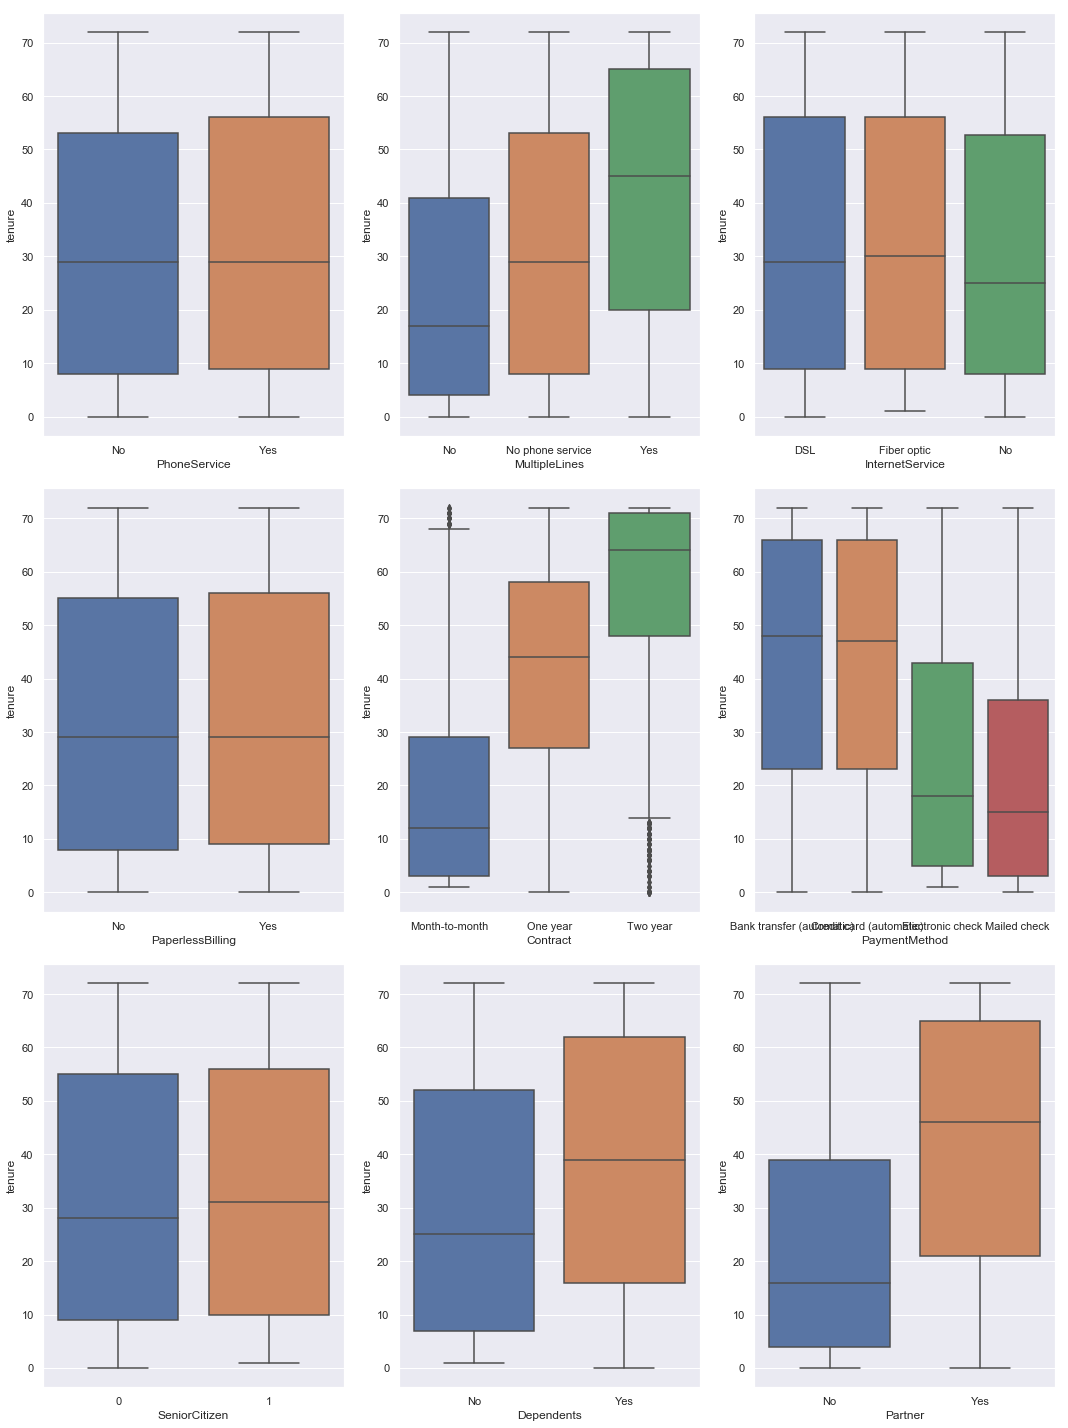

In [11]:
#Lets look for any trends with the core services and tenure
sns.set(color_codes=True)
f, axes = plt.subplots(3, 3, figsize=(15, 20), sharex=False)

#Plot Phone Service against Tenure
ax = sns.boxplot(x='PhoneService',y='tenure',data=cleaned_customer_churn_df,ax=axes[0,0])

#Plot Multple Lines against Tenure
ax = sns.boxplot(x='MultipleLines',y='tenure',data=cleaned_customer_churn_df,ax=axes[0,1])

#Plot Internet Servic eagainst Tenure
ax = sns.boxplot(x='InternetService',y='tenure',data=cleaned_customer_churn_df, ax=axes[0,2])

#Plot Contract against Tenure
ax = sns.boxplot(x='Contract',y='tenure',data=cleaned_customer_churn_df, ax=axes[1,1])

#Plot PaperlessBilling against Tenure
ax = sns.boxplot(x='PaperlessBilling',y='tenure',data=cleaned_customer_churn_df, ax=axes[1,0])

#Plot PaymentMethod against Tenure
ax = sns.boxplot(x='PaymentMethod',y='tenure',data=cleaned_customer_churn_df, ax=axes[1,2])

#Plot Dependents against Tenure
ax = sns.boxplot(x='Dependents',y='tenure',data=cleaned_customer_churn_df, ax=axes[2,1])

#Plot SeniorCitizen against Tenure
ax = sns.boxplot(x='SeniorCitizen',y='tenure',data=cleaned_customer_churn_df, ax=axes[2,0])

#Plot Partner against Tenure
ax = sns.boxplot(x='Partner',y='tenure',data=cleaned_customer_churn_df, ax=axes[2,2])

plt.tight_layout()
plt.show()

<p>There are some areas that have higher Tenure rates than others.  I think we need to take this a step further and add in Churn to see if there are any insights in the data.</p>

<h2>Compare core services to Tenure with Churn overlaid</h2>

In [ ]:
sns.set(color_codes=True)
f, axes = plt.subplots(3, 3, sharex=False)

#Plot Phone Service against Tenure
ax = sns.catplot(x='PhoneService',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df,ax=axes[0,0])

#Plot Multple Lines against Tenure
ax = sns.catplot(x='MultipleLines',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df,ax=axes[0,1])

#Plot Internet Servic eagainst Tenure
ax = sns.catplot(x='InternetService',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df, ax=axes[0,2])

#Plot Contract against Tenure
ax = sns.catplot(x='Contract',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df, ax=axes[1,1])

#Plot PaperlessBilling against Tenure
ax = sns.catplot(x='PaperlessBilling',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df, ax=axes[1,0])

#Plot PaymentMethod against Tenure
ax = sns.catplot(x='PaymentMethod',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df, ax=axes[1,2])

#Plot Dependents against Tenure
ax = sns.catplot(x='Dependents',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df, ax=axes[2,1])

#Plot SeniorCitizen against Tenure
ax = sns.catplot(x='SeniorCitizen',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df, ax=axes[2,0])

#Plot Partner against Tenure
ax = sns.catplot(x='Partner',y='tenure',kind='swarm',hue='Churn',data=cleaned_customer_churn_df, ax=axes[2,2])

plt.tight_layout()
plt.show()

<p>After doing this excercise, there appears to be some patterns in some of the categories.</p>
<p>We will continue this analysis and see if we can find correlations between the data.</p>

<h2>Correlations between data points</h2>

<h3>Relationship between Monthly Charges and Tenure with regression</h3>

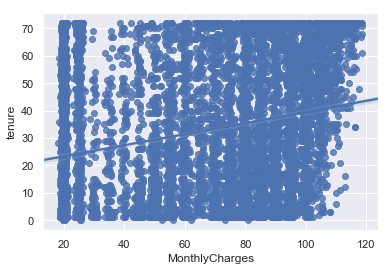

In [36]:
#lets see if there is a relationship between monthly charges and tenure
ax = sns.regplot(x='MonthlyCharges',y='tenure',data=cleaned_customer_churn_df)

plt.show()

<p>There does not appear to be a relationship between Tenure and Monthly Charges.</p>

<h3>Correlation between Tenure, Monthly Charges and Total Charges</h3>

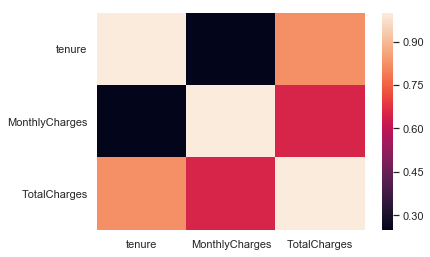

In [37]:
#lets check the correlation

corr = cleaned_customer_churn_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

<p>The main goal for doing a correlation check, was to see if there was a correlation between Tenure and Monthly Charges.  There is not a strong correlation between Tenure and Monthly charges.</p>
<p>The correlation between Total Charges and Tenure was expected because as Tenure increase we would expect to also see an increase in Total Charges.</p>
<p>The correlation between Monthly Charges and Total Charges is also expected because Total Charges is made up of Monthly charges.</p>

<h3>Correlation check between various core services (categoriacal)</h3>

In [38]:
#Lets conduct chi2 tests on certain categories against churn
categories_to_test = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','Contract','PaperlessBilling','PaymentMethod']
prob = 0.95 #lets set a probability of 95%
alpha = 1.0 - prob

print('Cramers V will messure how strong the relationship between the 2 variables, the closer to 1 the stronger the relationship.')
print('                    Small          Medium         Large')
print('Cramér’s V, k = 2* 0.10 – < 0.30  0.30 – < 0.50  ≥ 0.50')
print()

for c in categories_to_test:
    table, results = rp.crosstab(cleaned_customer_churn_df[c],cleaned_customer_churn_df['Churn'],prop = 'col',test='chi-square')
    print('Comparison of:',c,'to Churn.')
    print(table)
    print()
    print(results)
    print()
    crosstab = pd.crosstab(cleaned_customer_churn_df[c],cleaned_customer_churn_df['Churn'])
    stat, p, dof, expected = stats.chi2_contingency(crosstab)
    critical = stats.chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('Relationship (reject H0)')
    else:
        print('No Relationship (fail to reject H0)')
    if p <= alpha:
        print('Relationship (reject H0)')
    else:
        print('No Relationship (fail to reject H0)')
    print()
    print()

Cramers V will messure how strong the relationship between the 2 variables, the closer to 1 the stronger the relationship.
                    Small          Medium         Large
Cramér’s V, k = 2* 0.10 – < 0.30  0.30 – < 0.50  ≥ 0.50

Comparison of: gender to Churn.
         Churn                
            No     Yes     All
gender                        
Female   49.27   50.24   49.52
Male     50.73   49.76   50.48
All     100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.5224
1                    p-value =    0.4698
2               Cramer's phi =    0.0086

No Relationship (fail to reject H0)
No Relationship (fail to reject H0)


Comparison of: SeniorCitizen to Churn.
                Churn                
                   No     Yes     All
SeniorCitizen                        
0               87.13   74.53   83.79
1               12.87   25.47   16.21
All            100.00  100.00  100.00

                Chi-square test   resu

<p>Based on the p-value and Cramer's phi there are significant relationships between churn and some core services</p>
<p>Those core services are:</p>
<ul>
    <li>Senior Citizen</li>
    <li>Partner</li>
    <li>Dependents</li>
    <li>Internet Service</li>
    <li>Contract</li>
    <li>Paperless Billing</li>
    <li>Payment Method</li>
</ul>

<h3>Lets now compare Tenure with Churn rate</h3>

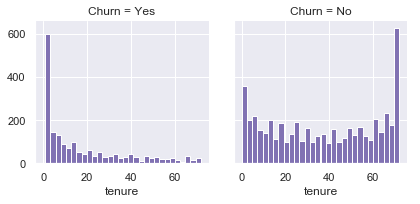

In [20]:
#Lets see the frequency of tenure
g = sns.FacetGrid(cleaned_customer_churn_df, col='Churn', col_order=["Yes", "No"])
g = g.map(plt.hist, "tenure",bins=30, color="m")

plt.show()

<p>It appears that the most amount of Churn happens at the very beginning of the contract.</p>
<h3>Churn Comparison based on chi^2 data for the following services:</h3>
<ul>
    <li>Senior Citizen</li>
    <li>Partner</li>
    <li>Dependents</li>
    <li>Internet Service</li>
    <li>Contract</li>
    <li>Paperless Billing</li>
    <li>Payment Method</li>
</ul>
<p>Now we will take a data set of only churned customers and do a Facet Grid for each service to see how soon they left based on category</p>

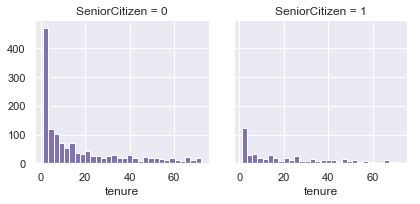

In [28]:
#Lets see the frequency of tenure
g = sns.FacetGrid(cleaned_churned_customer_churn_df, col='SeniorCitizen', col_order=[0, 1])
g = g.map(plt.hist, "tenure",bins=30, color="m")

plt.show()

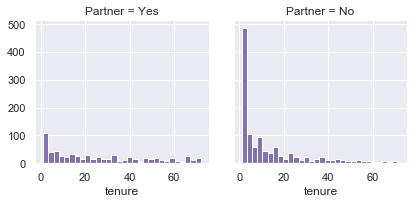

In [26]:
#Lets see the frequency of tenure to Partner
g = sns.FacetGrid(cleaned_churned_customer_churn_df, col='Partner', col_order=["Yes", "No"])
g = g.map(plt.hist, "tenure",bins=30, color="m")

plt.show()

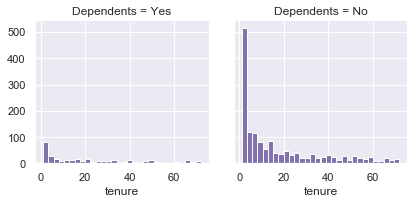

In [29]:
#Lets see the frequency of tenure to Dependents
g = sns.FacetGrid(cleaned_churned_customer_churn_df, col='Dependents', col_order=["Yes", "No"])
g = g.map(plt.hist, "tenure",bins=30, color="m")

plt.show()

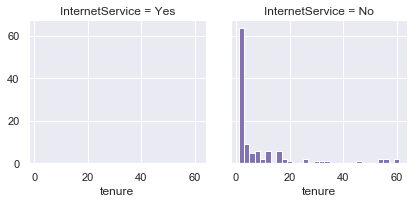

In [30]:
#Lets see the frequency of tenure to Internet Service
g = sns.FacetGrid(cleaned_churned_customer_churn_df, col='InternetService', col_order=["Yes", "No"])
g = g.map(plt.hist, "tenure",bins=30, color="m")

plt.show()

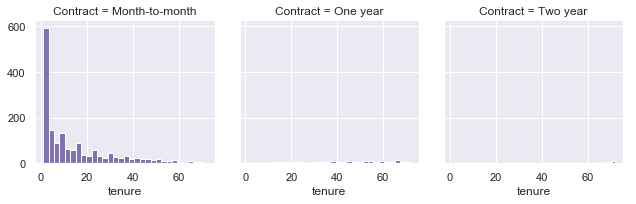

In [32]:
#Lets see the frequency of tenure to Contract
g = sns.FacetGrid(cleaned_churned_customer_churn_df, col='Contract', col_order=['Month-to-month', 'One year', 'Two year'])
g = g.map(plt.hist, "tenure",bins=30, color="m")

plt.show()

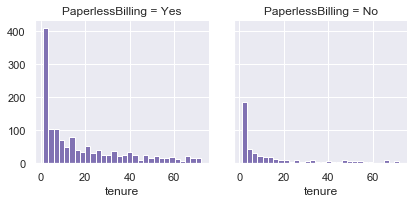

In [33]:
#Lets see the frequency of tenure to Paperless Billing
g = sns.FacetGrid(cleaned_churned_customer_churn_df, col='PaperlessBilling', col_order=["Yes", "No"])
g = g.map(plt.hist, "tenure",bins=30, color="m")

plt.show()

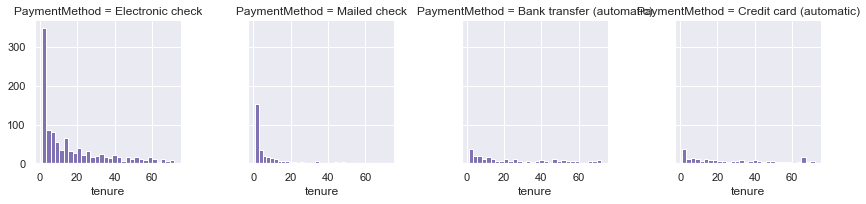

In [35]:
#Lets see the frequency of tenure to Payment Method
g = sns.FacetGrid(cleaned_churned_customer_churn_df, col='PaymentMethod', col_order=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
g = g.map(plt.hist, "tenure",bins=30, color="m")

plt.show()

<h2>Analysis</h2>
<p>Based on the final service comparisons, we can see some very distinct patterns emerge.  Each of the services when broken down by their distinctive parts now show customers that have a higher rate of churn.</p>
<p>The following scenarios have a much higher rate of churn:</p>
<ul>
    <li>Non-Senior Customers are more likely to churn in the first few years.</li>
    <li>Customers without partners are more likely to churn in the first few years.</li>
    <li>Customers without dependents are more likely to churn in the first few years.</li>
    <li>Customers without internet service are more likely to churn in the first few years.</li>
    <li>Customers that are on month-to-month billing are more likely to churn in the first few years.</li>
    <li>Customers that receive paperless billing are more likely to churn in the first few years.</li>
    <li>Customers that pay via Electronic Check are more likely to churn in the first few years.</li>
</ul>
